<a href="https://colab.research.google.com/github/masoud-moghini/TinyML/blob/main/TinyMLCh06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


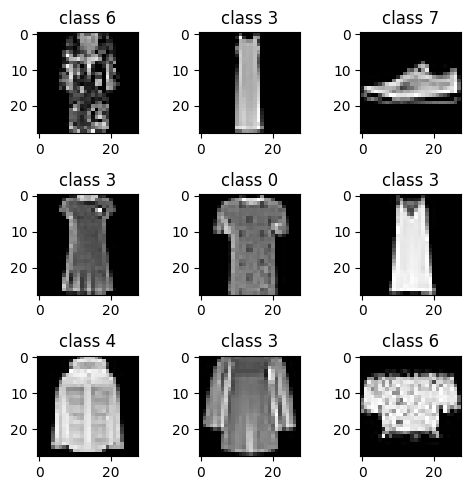

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
for i in range (9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num],cmap='gray')
  plt.title('class {}'.format(y_train[num]))

plt.tight_layout()

In [ ]:
num_class = 10
X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train.reshape(-1,X_train.shape[1],X_train.shape[2],1)
X_test.reshape(-1,X_test.shape[1],X_test.shape[2],1)

In [ ]:
y_train = to_categorical(y_train,num_class)
y_test = to_categorical(y_test,num_class)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape= (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
opt = Adam(lr=0.002)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=128,epochs= 15)

Epoch 1/15
469/469 [==============================] - 56s 117ms/step - loss: 0.6011 - accuracy: 0.7812
Epoch 2/15
469/469 [==============================] - 51s 108ms/step - loss: 0.4063 - accuracy: 0.8527
Epoch 3/15
469/469 [==============================] - 48s 102ms/step - loss: 0.3552 - accuracy: 0.8704
Epoch 4/15
469/469 [==============================] - 47s 99ms/step - loss: 0.3259 - accuracy: 0.8801
Epoch 5/15
469/469 [==============================] - 48s 103ms/step - loss: 0.3008 - accuracy: 0.8890
Epoch 6/15
469/469 [==============================] - 47s 99ms/step - loss: 0.2813 - accuracy: 0.8960
Epoch 7/15
469/469 [==============================] - 50s 107ms/step - loss: 0.2715 - accuracy: 0.8995
Epoch 8/15
469/469 [==============================] - 53s 112ms/step - loss: 0.2587 - accuracy: 0.9036
Epoch 9/15
469/469 [==============================] - 54s 115ms/step - loss: 0.2488 - accuracy: 0.9085
Epoch 10/15
469/469 [==============================] - 53s 112ms/step - los

In [ ]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2325 - accuracy: 0.9151


In [ ]:
print('accuracy score on the model is {}'.format(score[1]))

accuracy score on the model is 0.9150999784469604


In [ ]:
model.save('fashion_score.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
baseline_model = load_model('fashion_score.h5')

In [ ]:
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
Converter = tf.lite.TFLiteConverter.from_keras_model(baseline_model)
tflite_model = Converter.convert()

In [ ]:
#export model as concrete function

In [ ]:
func = tf.function(baseline_model).get_concrete_function(tf.TensorSpec(baseline_model.inputs[0].shape, baseline_model.inputs[0].dtype))
func.graph.as_graph_def()

In [ ]:
#serialized graph representation of concrete function

In [ ]:
converter_from_concrete_function = tf.lite.TFLiteConverter.from_concrete_functions([func])

In [ ]:
tflite_model = converter_from_concrete_function.convert()

In [ ]:
import pathlib
tflite_models_dir = pathlib.Path('/content/tfile-models')
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/'model.tflite'
tflite_model_file.write_bytes(tflite_model)

723080

In [ ]:
tflite_file = '/content/tfile-models/model.tflite'
interpreter = tf.lite.Interpreter(model_path = tflite_file)
interpreter.allocate_tensors()

# Chapter 6
# Deploye on board


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()


#Analyzing shape of data
print('training set ', '\nData :', trainX.shape, '\nLabel :', trainY.shape)

print('\ntest set', '\nData :', testX.shape, '\nLabel :', testY.shape)

170498071/170498071 [==============================] - 10s 0us/step
training set  
Data : (50000, 32, 32, 3) 
Label : (50000, 1)

test set 
Data : (10000, 32, 32, 3) 
Label : (10000, 1)


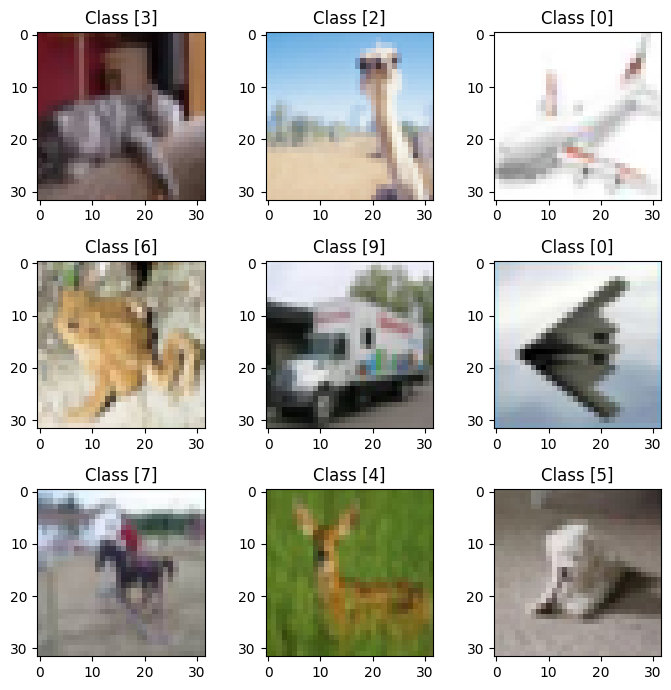

In [3]:
from numpy import random

plt.rcParams['figure.figsize'] = (7,7)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(trainX))
    plt.imshow(trainX[num], cmap='gray')
    plt.title("Class {}".format(trainY[num]))

plt.tight_layout()

In [4]:
#One Hot Encoding Labels from Train and Test Dataset
from tensorflow.keras.utils import to_categorical

trainX = trainX.astype('float32')   # change integers to 32-bit floating point numbers
testX = testX.astype('float32')

trainX /= 255                        # normalize the input
testX /= 255

trainY_one_hot = to_categorical(trainY)
testY_one_hot = to_categorical(testY)


print(trainY_one_hot[1,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
from tensorflow.keras.applications import MobileNet

pretrained_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3))

17225924/17225924 [==============================] - 1s 0us/step


In [6]:
pretrained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32) 

In [7]:
def base_model():

  model = Sequential()
  model.add(Dropout(0.3, input_shape = (1, 1, 1024)))
  model.add(Flatten())

  #Adding the Dense Layers and Dropout
  #model.add(Dense(512,activation=('relu')))

  model.add(Dense(128,activation=('relu')))

  model.add(Dropout(.3))

  model.add(Dense(10,activation=('softmax')))
  return model

In [8]:
y = pretrained_model
basemodel = base_model()
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 1, 1, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 132490 (517.54 KB)
Trainable params: 132490 (517.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 4.1 MB/s eta 0:00:00


In [10]:
#pretrained_model = MobileNet(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
import tensorflow_model_optimization as tfmot

pretrained_model.trainable = True

# for layer in pretrained_model.layers[:-1]:
#     layer.trainable = False

q_pretrained_model = tfmot.quantization.keras.quantize_model(pretrained_model)
q_base_model = tfmot.quantization.keras.quantize_model(basemodel)

original_inputs = tf.keras.layers.Input(shape=(32, 32, 3))
y = q_pretrained_model(original_inputs)
original_outputs = q_base_model(y)

model = tf.keras.Model(original_inputs, original_outputs)
model.summary()

ValueError: Unable to clone model. This generally happens if you used custom Keras layers or objects in your model. Please specify them via `quantize_scope` for your calls to `quantize_model` and `quantize_apply`. [Layer <tf_keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a0ccd8de470> supplied to wrapper is not a supported layer type. Please ensure wrapped layer is a valid Keras layer.].